In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('saved_model/my_modelBB02')

# Check its architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

In [2]:
df = pd.read_csv("C:/Users/yanzh/Desktop/BB02.csv")
time = df['time'].values
chlorophylla = df['chlorophylla'].values
df
#Transform the normalized scale to real scale
chlorophylla_min = 0.16
chlorophylla_max = 15.41
time_min = 34708.00 
time_max = 44354.4930555556

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(chlorophylla_max - chlorophylla_min) + chlorophylla_min

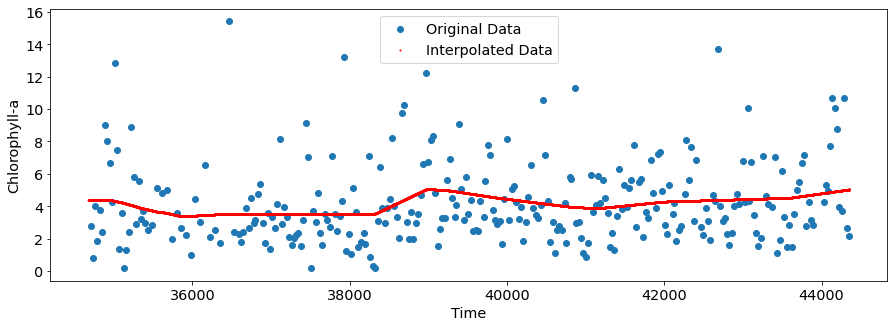

In [3]:
# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, chlorophylla*(chlorophylla_max - chlorophylla_min) + chlorophylla_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Chlorophyll-a')
plt.legend()
plt.show()

In [4]:
model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

313/313 [==============================] - 0s 368us/step - loss: 2.1103e-16
['loss']


In [5]:
interpolation = model.predict([0.078681444
,0.084797656
,0.091121198
,0.097444739
,0.103768281
,0.110091822
,0.116519029
,0.122635241
,0.128958783
,0.138495927
,0.141605866
,0.147929407
,0.154356613
,0.160472826
,0.166796367
,0.173119909
,0.176333512
,0.179443451
,0.185766992
,0.192194198
,0.801016489
,0.895765948
,0.955684096
,0.958794035
,0.962007638
])
interpolation

array([[0.23604143],
       [0.23166317],
       [0.22862363],
       [0.22596222],
       [0.22220221],
       [0.2176519 ],
       [0.2131511 ],
       [0.21128228],
       [0.21236578],
       [0.21402064],
       [0.21455505],
       [0.21563014],
       [0.21675318],
       [0.21785256],
       [0.21892029],
       [0.21891758],
       [0.21891618],
       [0.21891484],
       [0.2189121 ],
       [0.21890932],
       [0.27474612],
       [0.28346765],
       [0.30067194],
       [0.30200988],
       [0.30339247]], dtype=float32)